# Business Problem 
### Problem Context
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

### Content
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

### Features:

* Age of the patient
* Gender of the patient
* Total Bilirubin
* Direct Bilirubin
* Alkaline Phosphotase
* Alamine Aminotransferase
* Aspartate Aminotransferase
* Total Protiens
* Albumin
* Albumin and Globulin Ratio
* Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

# Domain Analysis

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\Capstone Projects\indian_liver_patient.csv")

In [3]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
df1=df.copy()

## Basic Checks

In [5]:
df1.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
!pip install sweetviz

import sweetviz as sv  # univarite analysis

my_report = sv.analyze(df1)  # pass the original datafarame

my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Selecting the numeric columns

In [9]:
num_col =["Age","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase","Alamine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio"]

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [11]:
df1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Exploratory data analysis


## Distribution of Numerical Features

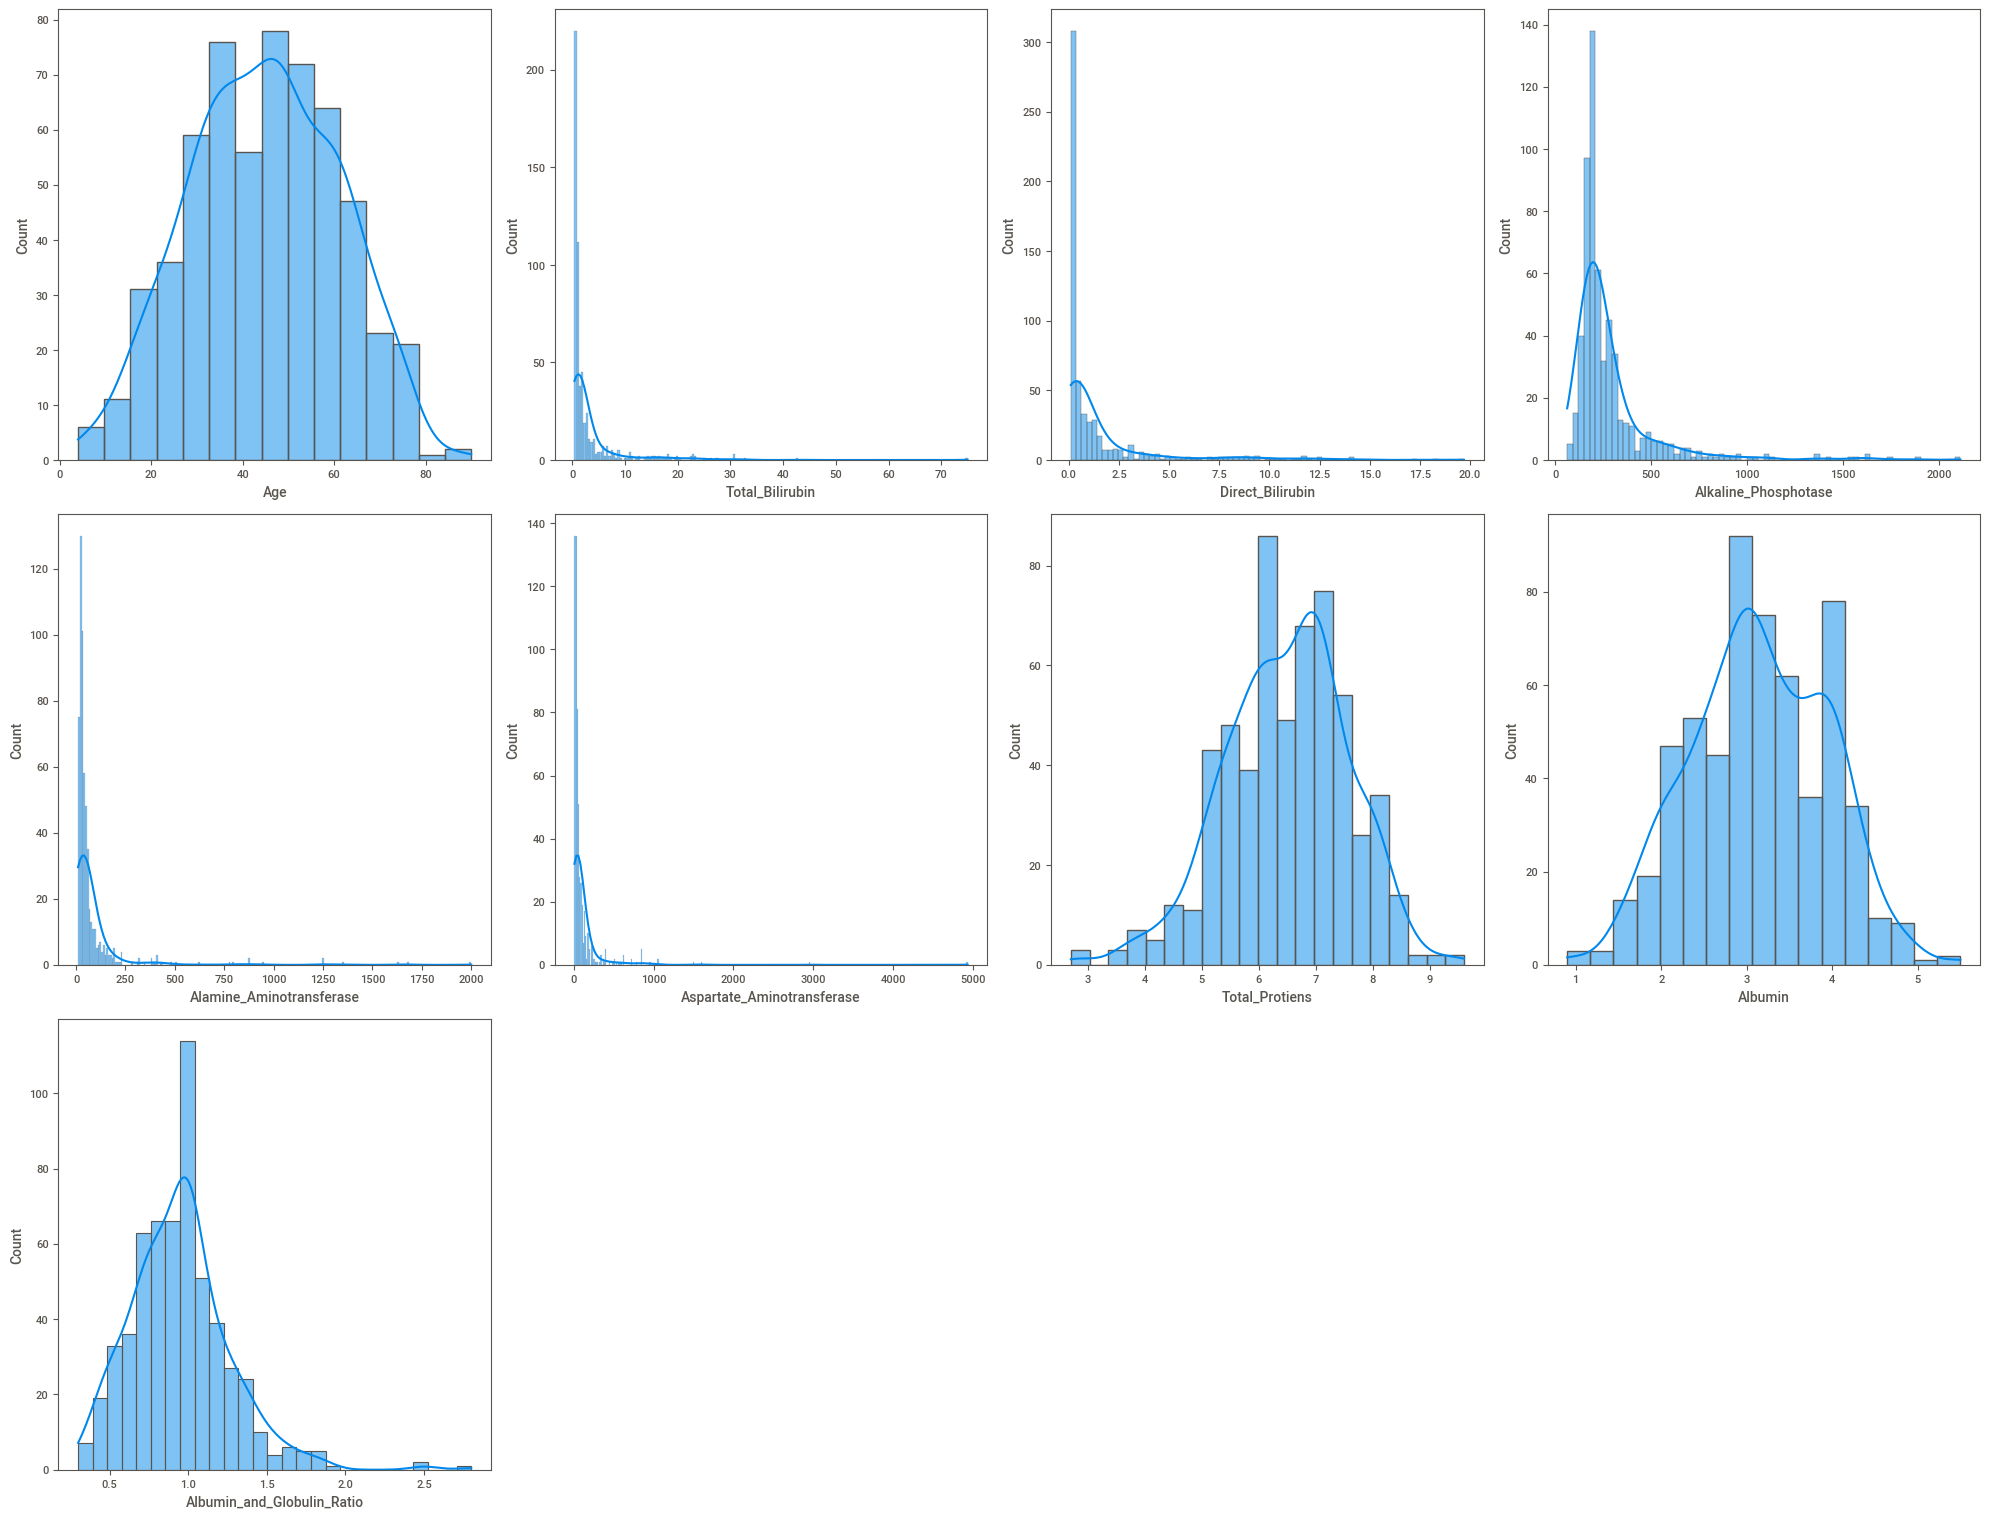

In [12]:
plt.figure(figsize=(20,25),facecolor='white')  # to set canvas
plotnumber=1 # counter

for column in num_col: # accessing the columns
    plt.subplot(5,4,plotnumber)
    sns.histplot(x=df1[column],kde=True)
    plt.xlabel(column) #assign name x axis 
    plt.ylabel('Count')
    plotnumber+=1 # counter increment
plt.tight_layout()
plt.show()

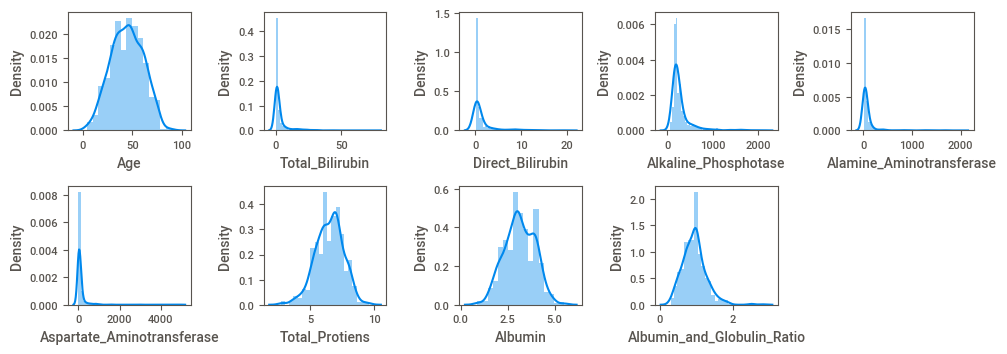

In [13]:
import seaborn as sns
plt.figure(figsize=(10,5))
i = 1
for column in num_col:
    plt.subplot(3,5,i)
    sns.distplot(df1[column])
    i=i+1
plt.tight_layout()

## Distribution of Categorical Feature

<AxesSubplot:xlabel='Age', ylabel='Gender'>

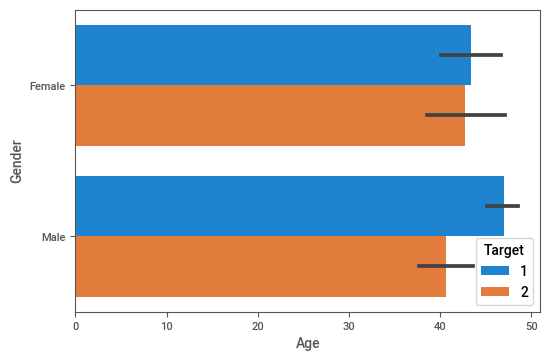

In [14]:
sns.barplot(x='Age',y='Gender',hue='Target',data=df1)

<AxesSubplot:xlabel='Gender', ylabel='count'>

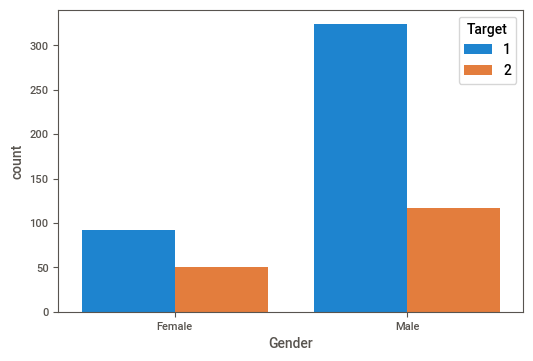

In [15]:
sns.countplot(x=df1["Gender"],hue=df1["Target"])

## Scatter plot to find the relationship between variables

In [16]:
df1.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df1['Target'] = lc.fit_transform(df1.Target)

In [18]:
df1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,0
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,0
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,0


<AxesSubplot:xlabel='Total_Bilirubin', ylabel='Direct_Bilirubin'>

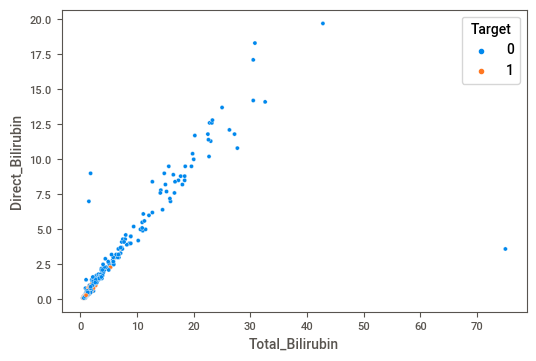

In [19]:
sns.scatterplot(x='Total_Bilirubin',y='Direct_Bilirubin',data=df1,hue="Target")

In [20]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df1['Gender'] = lc.fit_transform(df1.Gender)

In [21]:
df1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,0
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,0
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,0


<AxesSubplot:xlabel='Albumin', ylabel='Total_Protiens'>

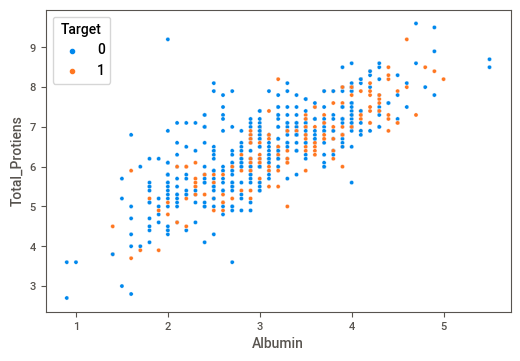

In [22]:
sns.scatterplot(x='Albumin',y='Total_Protiens',hue='Target',data=df1)

<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio', ylabel='Albumin'>

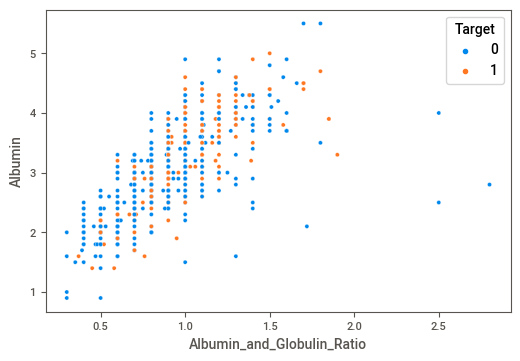

In [23]:
sns.scatterplot(x='Albumin_and_Globulin_Ratio',y='Albumin',hue='Target',data=df1)

# Data Preprocessing and Feature Engineering

## Data Cleaning

In [24]:
df1.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [25]:
df1['Albumin_and_Globulin_Ratio'].fillna(df1.Albumin_and_Globulin_Ratio.mean(), inplace=True)
print(df1.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64


### Checking the duplicates

In [26]:
df1[df1.duplicated()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
19,40,0,0.9,0.3,293,232,245,6.8,3.1,0.80,0
26,34,1,4.1,2.0,289,875,731,5.0,2.7,1.10,0
34,38,0,2.6,1.2,410,59,57,5.6,3.0,0.80,1
55,42,1,8.9,4.5,272,31,61,5.8,2.0,0.50,0
62,58,1,1.0,0.5,158,37,43,7.2,3.6,1.00,0
106,36,1,5.3,2.3,145,32,92,5.1,2.6,1.00,1
108,36,1,0.8,0.2,158,29,39,6.0,2.2,0.50,1
138,18,1,0.8,0.2,282,72,140,5.5,2.5,0.80,0
143,30,1,1.6,0.4,332,84,139,5.6,2.7,0.90,0
158,72,1,0.7,0.1,196,20,35,5.8,2.0,0.50,0


In [27]:
#df1.drop_duplicates(keep="first",inplace=True)
#df1

## Checking the outliers

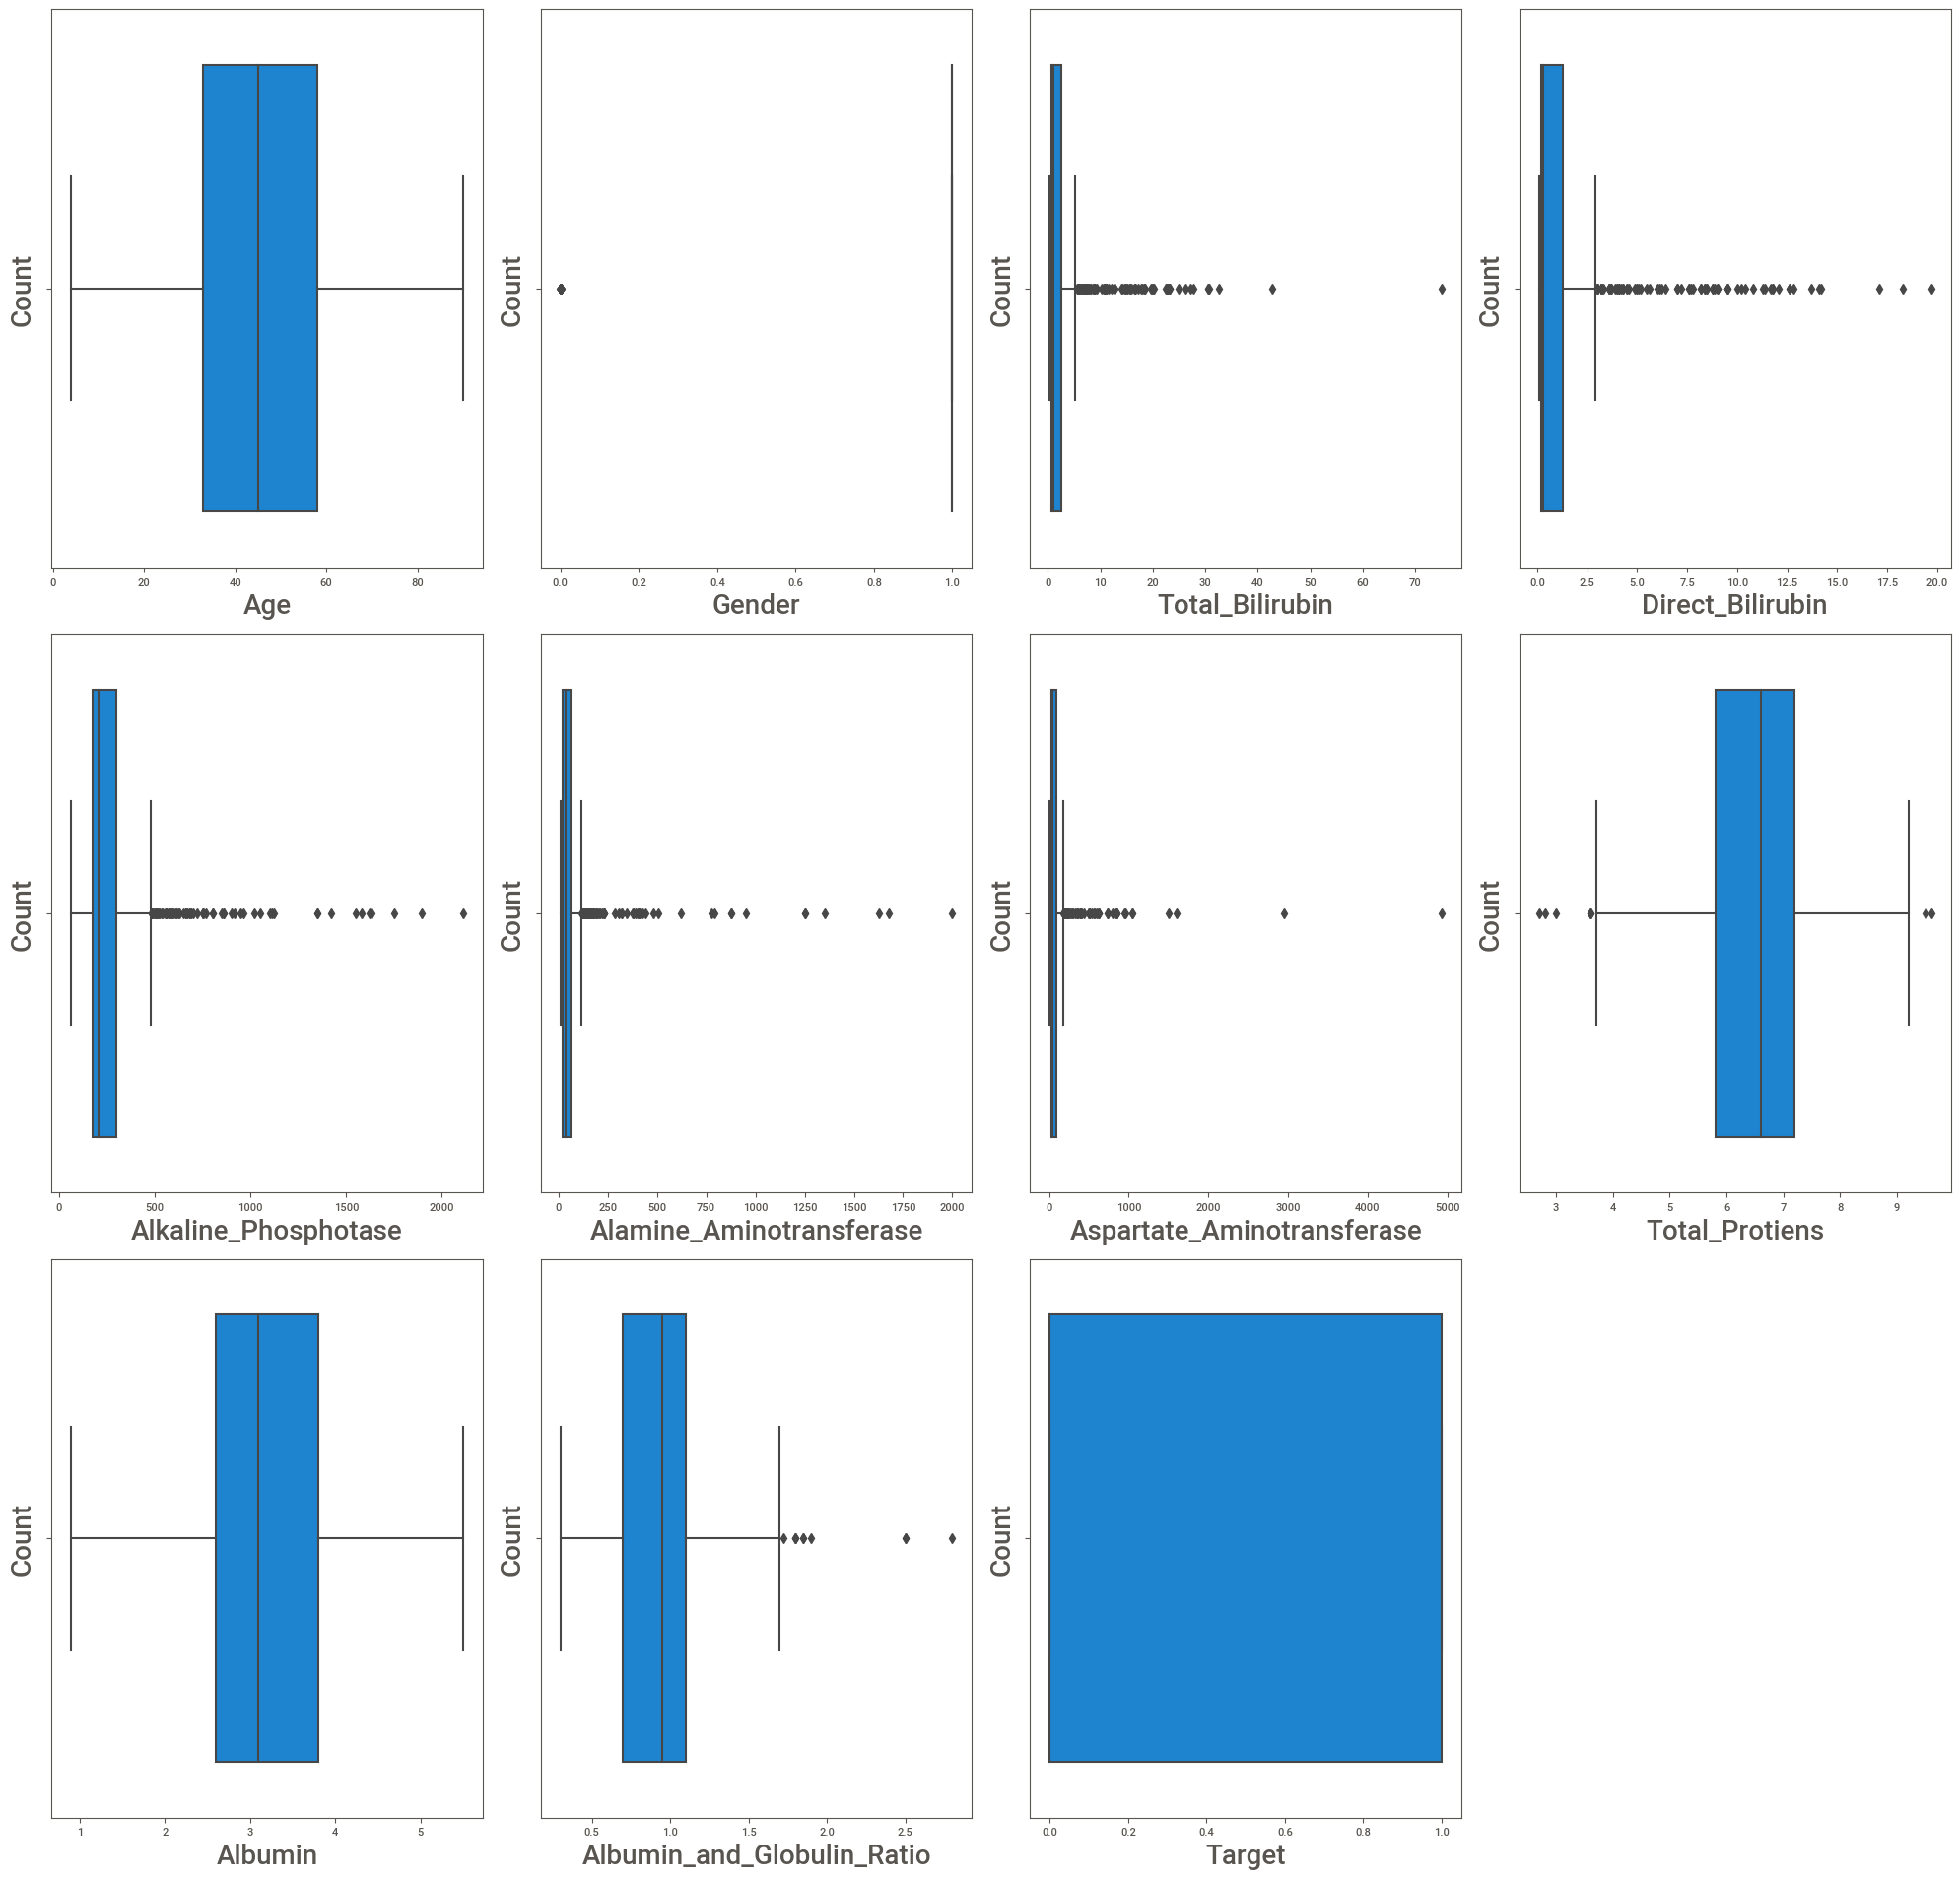

In [28]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df1:
    
    plt.subplot(4,4,plotnumber)
    sns.boxplot(df1[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

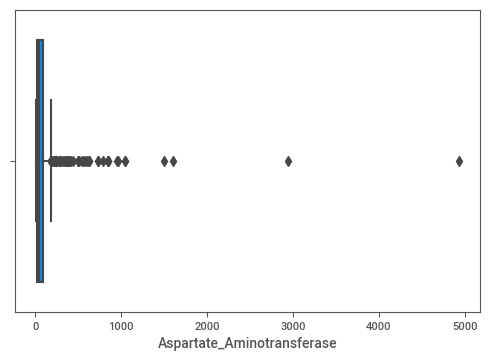

In [29]:
sns.boxplot(df1.Aspartate_Aminotransferase)

In [30]:
df1.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
119    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [31]:
df1.loc[df1.Aspartate_Aminotransferase >=2500]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
117,32,1,12.7,6.2,194,2000,2946,5.7,3.3,1.3,0
135,66,1,11.3,5.6,1110,1250,4929,7.0,2.4,0.5,0


In [32]:
df1 = df1[df1.Aspartate_Aminotransferase <=2500]
df1.shape

(581, 11)

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

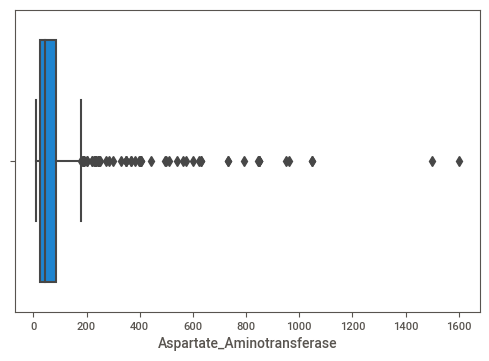

In [33]:
sns.boxplot(df1.Aspartate_Aminotransferase)

<AxesSubplot:xlabel='Total_Bilirubin'>

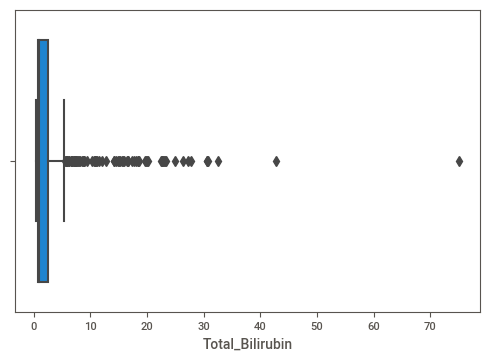

In [34]:
sns.boxplot(df1.Total_Bilirubin)

In [35]:
df1.Total_Bilirubin.sort_values(ascending=False).head()

166    75.0
559    42.8
505    32.6
531    30.8
504    30.5
Name: Total_Bilirubin, dtype: float64

In [36]:
df1 = df1[df1.Total_Bilirubin <=70]
df1.shape

(580, 11)

<AxesSubplot:xlabel='Total_Bilirubin'>

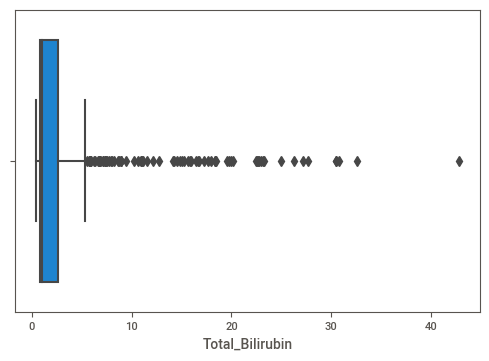

In [37]:
sns.boxplot(df1.Total_Bilirubin)

# Feature Engineering

# Correlations

Finally, let's take a look at the relationships between numeric features and other numeric features.

Correlation is a value between -1 and 1 that represents how closely values for two separate features move in unison.

Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.

Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.

Correlations near -1 or 1 indicate a strong relationship.

Those closer to 0 indicate a weak relationship.
0 indicates no relationship.

Text(0.5, 1.0, 'Correlation between the features')

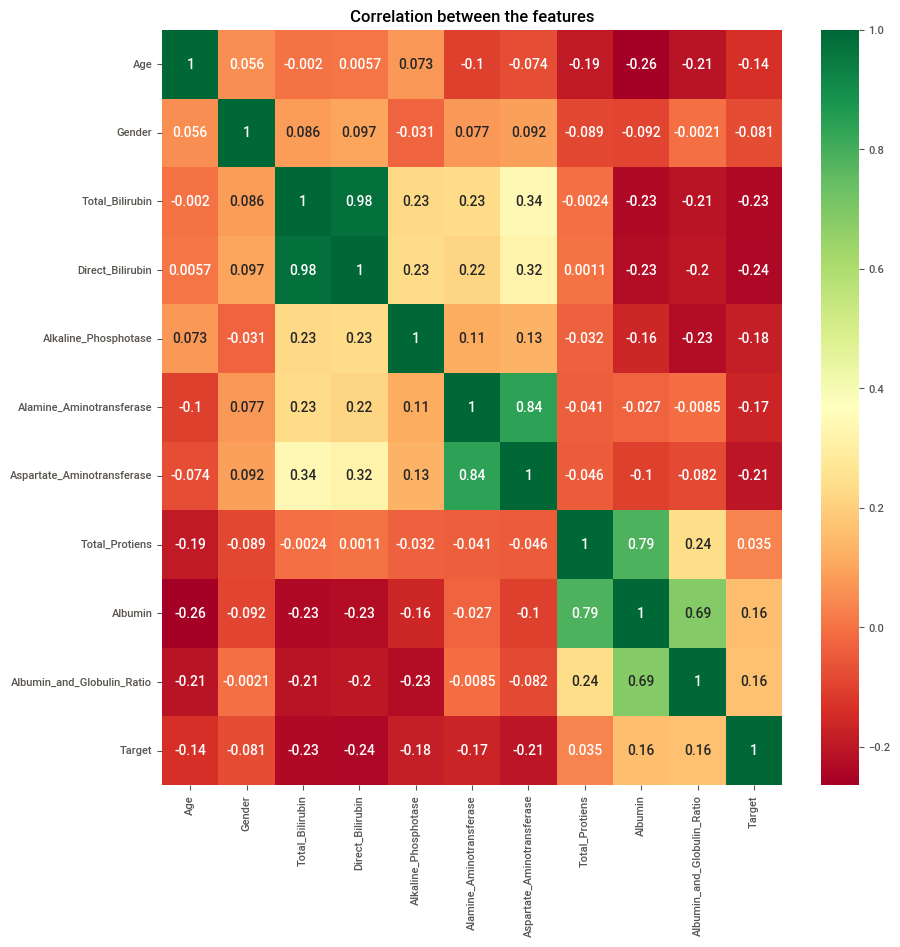

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,cmap="RdYlGn")
plt.title("Correlation between the features")

In [39]:
df1.drop("Total_Bilirubin",axis=1,inplace=True)
df1

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.1,500,20,34,5.9,1.6,0.37,1
579,40,1,0.1,98,35,31,6.0,3.2,1.10,0
580,52,1,0.2,245,48,49,6.4,3.2,1.00,0
581,31,1,0.5,184,29,32,6.8,3.4,1.00,0


# Model Creation 

In [40]:
# Splitting x and y 
x=df1.drop('Target',axis=1)
y=df1[['Target']]

## Scaling

In [41]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc=StandardScaler()
#sc=MinMaxScaler()
X_scaled=sc.fit_transform(x)

## Train Test data

In [42]:
# importing train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42,test_size=0.2,stratify=y)

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

y_proba = lr.predict_proba(x_test)
y_preda = y_proba[:,1] # for positive values

## Logistic Regression Metrics

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        83
           1       0.58      0.21      0.31        33

    accuracy                           0.73       116
   macro avg       0.67      0.58      0.57       116
weighted avg       0.70      0.73      0.69       116

[[78  5]
 [26  7]]


Text(0, 0.5, 'True Positive Rate')

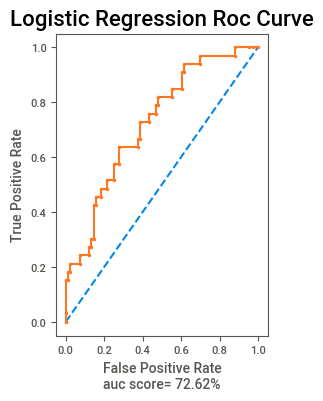

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_curve,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
lr_acc_score= accuracy_score(y_test,y_pred)
lr_precision = precision_score(y_test,y_pred)
lr_recall = recall_score(y_test,y_pred)
lr_f1_score = f1_score(y_test,y_pred)

lr_cv_score = cross_val_score(lr, X_scaled, y, cv=3, scoring = 'accuracy').mean()

lr_AUC = roc_auc_score(y_test,y_preda)
fpr, tpr, thresholds = roc_curve(y_test, y_preda)

 #  plot ROC and AUC
plt.subplot(122)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("Logistic Regression Roc Curve", fontsize = 16)
plt.xlabel('False Positive Rate\nauc score= {:.2%}'.format(lr_AUC))
plt.ylabel('True Positive Rate')

# KNN

In [45]:
X=df1.drop("Target",axis=1)
y=df1[["Target"]]

In [46]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc=StandardScaler()
#sc=MinMaxScaler()
X_scaled=sc.fit_transform(x)

In [47]:
# importing train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42,test_size=0.2,stratify=y)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

knn_pred=knn.predict(x_test)

In [49]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75        83
           1       0.33      0.30      0.32        33

    accuracy                           0.63       116
   macro avg       0.53      0.53      0.53       116
weighted avg       0.62      0.63      0.62       116



## For finding best K value

In [50]:
acc_list = []
for k in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1 = knn.predict(x_test)
    acc= accuracy_score(y_test,y_pred1)
    acc_list.append(acc)

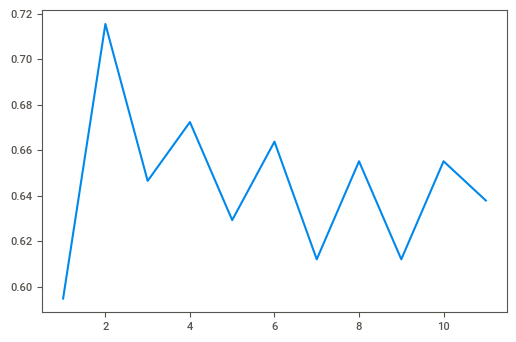

In [51]:
plt.plot(range(1,12),acc_list)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

y_pred1=knn.predict(x_test)

y_proba1 = knn.predict_proba(x_test)
y_preda1 = y_proba1[:,1] #for positive values

In [53]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred1))

knn_acc_score = accuracy_score(y_test,y_pred1)

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        83
           1       0.50      0.30      0.38        33

    accuracy                           0.72       116
   macro avg       0.63      0.59      0.60       116
weighted avg       0.69      0.72      0.69       116



# Smote the data for better results

In [54]:
y_train.value_counts()

Target
0         330
1         134
dtype: int64

In [55]:
from imblearn.over_sampling import SMOTE
sm= SMOTE()
x_train_smote,y_train_smote = sm.fit_resample(x_train,y_train)
y_train_smote.value_counts()

Target
0         330
1         330
dtype: int64

In [56]:
#from collections import Counter
#print("Actual Classes:",Counter(y_train))
#print("SMOTE Classes:",Counter(y_train_smote))

## Now we are applying Knn on smote data

In [57]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#sc = MinMaxScaler()
#sc=StandardScaler()
#x_train_smote_scaled = sc.fit_transform(x_train_smote)
#x_test_scaled = sc.transform(x_test)

knn1 = KNeighborsClassifier(n_neighbors=2)
knn1.fit(x_train_smote,y_train_smote)

y_pred = knn1.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        83
           1       0.41      0.52      0.46        33

    accuracy                           0.66       116
   macro avg       0.60      0.61      0.60       116
weighted avg       0.68      0.66      0.67       116

[[59 24]
 [16 17]]


## KNN metrics

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        83
           1       0.50      0.30      0.38        33

    accuracy                           0.72       116
   macro avg       0.63      0.59      0.60       116
weighted avg       0.69      0.72      0.69       116

[[73 10]
 [23 10]]


Text(0, 0.5, 'True Positive Rate')

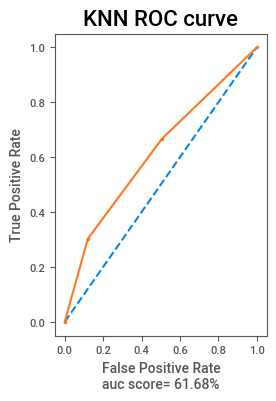

In [58]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_curve,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
knn_acc_score= accuracy_score(y_test,y_pred1)
knn_precision = precision_score(y_test,y_pred1)
knn_recall = recall_score(y_test,y_pred1)
knn_f1_score = f1_score(y_test,y_pred1)

knn_cv_score = cross_val_score(knn, X, y, cv=3, scoring = 'accuracy').mean()

knn_AUC = roc_auc_score(y_test,y_preda1)
fpr, tpr, thresholds = roc_curve(y_test, y_preda1)

 #  plot ROC and AUC
plt.subplot(122)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("KNN ROC curve", fontsize = 16)
plt.xlabel('False Positive Rate\nauc score= {:.2%}'.format(knn_AUC))
plt.ylabel('True Positive Rate')

# Support Vector Machine

In [59]:
X=df1.drop("Target",axis=1)
y=df1[["Target"]]

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
from sklearn.svm import SVC
svc = SVC(gamma="auto")
svc.probability=True
svc.fit(X_train,y_train)

y_pred2=svc.predict(X_test)

y_proba2 = svc.predict_proba(X_test)
y_preda2 = y_proba2[:,1] #for positive values

In [62]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred2))

svc_acc_score=accuracy_score(y_test,y_pred2)

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        84
           1       0.00      0.00      0.00        32

    accuracy                           0.72       116
   macro avg       0.36      0.50      0.42       116
weighted avg       0.52      0.72      0.61       116



## Applying Smote

In [63]:
y_train.value_counts()

Target
0         329
1         135
dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE # smote means that sampling every class should be equalfor y training data
sm= SMOTE()
x_smote,y_smote = sm.fit_resample(x_train,y_train)
y_smote.value_counts()

Target
0         329
1         329
dtype: int64

In [65]:
from sklearn.svm import SVC
svcclassifier = SVC()
svcclassifier.fit(x_smote,y_smote)

y_pre1=svcclassifier.predict(x_test)

In [66]:
print(classification_report(y_test,y_pre1))
print(confusion_matrix(y_test,y_pre1))

              precision    recall  f1-score   support

           0       0.70      0.62      0.66        84
           1       0.24      0.31      0.27        32

    accuracy                           0.53       116
   macro avg       0.47      0.47      0.46       116
weighted avg       0.57      0.53      0.55       116

[[52 32]
 [22 10]]


In [67]:
# checking the cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc,X,y,cv=3,scoring='accuracy')
print(scores)
print("Crosss validation score:",scores.mean())
print("std:",scores.std())
# std of < 0.05 is good

[0.71134021 0.71502591 0.70984456]
Crosss validation score: 0.7120702241689368
std: 0.002177350724298832


## SVM Metrics

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        84
           1       0.00      0.00      0.00        32

    accuracy                           0.72       116
   macro avg       0.36      0.50      0.42       116
weighted avg       0.52      0.72      0.61       116

[[84  0]
 [32  0]]


Text(0, 0.5, 'True Positive Rate')

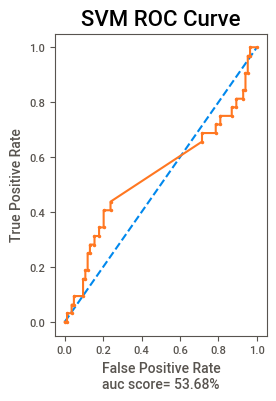

In [68]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_curve,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
svc_acc_score= accuracy_score(y_test,y_pred2)
svc_precision = precision_score(y_test,y_pred2)
svc_recall = recall_score(y_test,y_pred2)
svc_f1_score = f1_score(y_test,y_pred2)

svc_cv_score = cross_val_score(svc, X, y, cv=3, scoring = 'accuracy').mean()

svc_AUC = roc_auc_score(y_test,y_preda2)
fpr, tpr, thresholds = roc_curve(y_test, y_preda2)

 #  plot ROC and AUC
plt.subplot(122)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("SVM ROC Curve", fontsize = 16)
plt.xlabel('False Positive Rate\nauc score= {:.2%}'.format(svc_AUC))
plt.ylabel('True Positive Rate')

## Apply hyper parameter tuning  Using GridsearchCV

In [69]:
from sklearn.model_selection import GridSearchCV

#deifining parametret range
param_grid={'C':[0.1,5,10,50,60,70],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'random_state':(list(range(1,20)))}

model=SVC()
grid=GridSearchCV(model, param_grid, refit=True, verbose=2, scoring='f1', cv=5)
#fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [70]:
print(grid.best_params_) # print parameter after tuning

{'C': 60, 'gamma': 0.001, 'random_state': 1}


In [71]:
clf =SVC(C=60,gamma=0.001,random_state=1)
clf.fit(X_train,y_train)

y_hat=clf.predict(X_test)

In [72]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        84
           1       0.43      0.38      0.40        32

    accuracy                           0.69       116
   macro avg       0.60      0.59      0.60       116
weighted avg       0.68      0.69      0.68       116



## Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier # import decision algorithm
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred4=dt.predict(X_test)

dt.probability = True
y_proba4 = dt.predict_proba(X_test)
y_preda4 = y_proba4[:,1] #for positive values

## Decision Tree Metrics

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        84
           1       0.49      0.62      0.55        32

    accuracy                           0.72       116
   macro avg       0.66      0.69      0.67       116
weighted avg       0.74      0.72      0.73       116

[[63 21]
 [12 20]]


Text(0, 0.5, 'True Positive Rate')

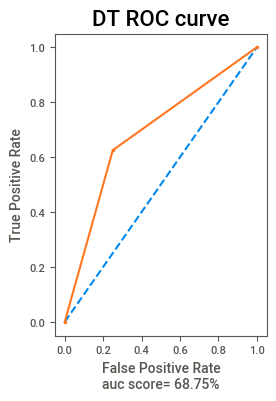

In [74]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_curve,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
dt_acc_score= accuracy_score(y_test,y_pred4)
dt_precision = precision_score(y_test,y_pred4)
dt_recall = recall_score(y_test,y_pred4)
dt_f1_score = f1_score(y_test,y_pred4)

dt_cv_score = cross_val_score(dt, X, y, cv=3, scoring = 'accuracy').mean()

dt_AUC = roc_auc_score(y_test,y_preda4)  #AUC
fpr, tpr, thresholds = roc_curve(y_test, y_preda4) #ROC

 #  plot ROC and AUC
plt.subplot(122)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("DT ROC curve", fontsize = 16)
plt.xlabel('False Positive Rate\nauc score= {:.2%}'.format(dt_AUC))
plt.ylabel('True Positive Rate')

## Hyper parameter tuning

In [75]:
#creating a dictionary for the decision tree hyperparameters
params = {
    "criterion":("gini","entropy"), #quality of split
    "splitter":("best","random"), #searches the feature for a split
    "max_depth":(list(range(1,20))), #depth of tree range 1 to 20
    "min_samples_split":[2,3,4],#min no of samples required to split internal node
    "min_samples_leaf":(list(range(1,20))) #minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf,params,scoring="f1",n_jobs=-1,verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods

tree_cv.fit(x_smote,y_smote) # taring with gridSearchCV

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='f1', verbose=1)

In [76]:
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 18,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'random'}

In [77]:
best_params = tree_cv.best_params_ # it will give best parameter
print(f"Best_params: {best_params})")

Best_params: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'})


In [78]:
dt1=DecisionTreeClassifier(criterion = 'entropy', max_depth=19, min_samples_leaf=1, min_samples_split= 2, splitter='random')
dt1.fit(x_smote,y_smote)
dt_pred1=dt1.predict(x_test)

In [79]:
print(classification_report(y_test,dt_pred1))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        84
           1       0.42      0.47      0.44        32

    accuracy                           0.67       116
   macro avg       0.60      0.61      0.60       116
weighted avg       0.69      0.67      0.68       116



# Random Forest 

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred5=rf.predict(X_test)

rf.probability = True
y_proba5 = rf.predict_proba(X_test)
y_preda5 = y_proba5[:,1] #for positive values

## Random Forest Metrics

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        84
           1       0.54      0.44      0.48        32

    accuracy                           0.74       116
   macro avg       0.67      0.65      0.66       116
weighted avg       0.73      0.74      0.73       116

[[72 12]
 [18 14]]


Text(0, 0.5, 'True Positive Rate')

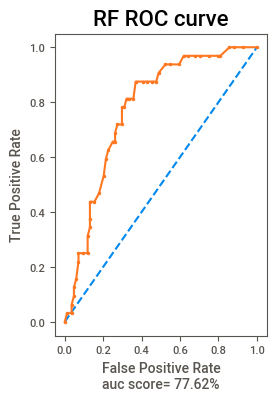

In [81]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_curve,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
rf_acc_score= accuracy_score(y_test,y_pred5)
rf_precision = precision_score(y_test,y_pred5)
rf_recall = recall_score(y_test,y_pred5)
rf_f1_score = f1_score(y_test,y_pred5)

rf_cv_score = cross_val_score(rf, X, y, cv=3, scoring = 'accuracy').mean()

rf_AUC = roc_auc_score(y_test,y_preda5)  #AUC
fpr, tpr, thresholds = roc_curve(y_test, y_preda5) #ROC

 #  plot ROC and AUC
plt.subplot(122)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("RF ROC curve", fontsize = 16)
plt.xlabel('False Positive Rate\nauc score= {:.2%}'.format(rf_AUC))
plt.ylabel('True Positive Rate')

## Apply hyper parameter tuning

In [82]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
#max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(x_smote, y_smote)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters
 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False})


In [83]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier(n_estimators=1800,max_features='sqrt',max_depth=50,min_samples_split=2,min_samples_leaf=1,bootstrap=True)
rf1.fit(x_train,y_train)
rf_pred1=rf1.predict(x_test)

In [84]:
print(classification_report(y_test,rf_pred1))

rf_acc_score = accuracy_score(y_test,rf_pred1)

              precision    recall  f1-score   support

           0       0.72      0.95      0.82        84
           1       0.20      0.03      0.05        32

    accuracy                           0.70       116
   macro avg       0.46      0.49      0.44       116
weighted avg       0.58      0.70      0.61       116



## Gradient Boosting Classifier

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(X_train,y_train)
y_pred6=gbm.predict(X_test)

gbm.probability = True
y_proba6 = gbm.predict_proba(X_test)
y_preda6 = y_proba6[:,1] #for positive values

## Gradient Boosting Metrics

              precision    recall  f1-score   support

           0       0.76      0.83      0.80        84
           1       0.42      0.31      0.36        32

    accuracy                           0.69       116
   macro avg       0.59      0.57      0.58       116
weighted avg       0.67      0.69      0.67       116

[[70 14]
 [22 10]]


Text(0, 0.5, 'True Positive Rate')

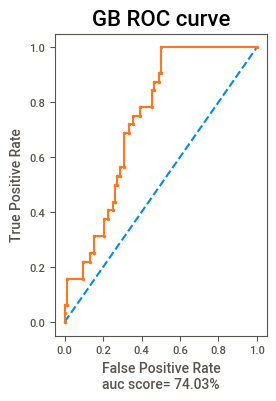

In [86]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_curve,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
gb_acc_score= accuracy_score(y_test,y_pred6)
gb_precision = precision_score(y_test,y_pred6)
gb_recall = recall_score(y_test,y_pred6)
gb_f1_score = f1_score(y_test,y_pred6)

gb_cv_score = cross_val_score(gbm, X, y, cv=3, scoring = 'accuracy').mean()

gb_AUC = roc_auc_score(y_test,y_preda6)  #AUC
fpr, tpr, thresholds = roc_curve(y_test, y_preda6) #ROC

 #  plot ROC and AUC
plt.subplot(122)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("GB ROC curve", fontsize = 16)
plt.xlabel('False Positive Rate\nauc score= {:.2%}'.format(gb_AUC))
plt.ylabel('True Positive Rate')

# XG boost

In [87]:
!pip install xgboost 

In [88]:
import xgboost # xgboost is not part of sklearn

In [89]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred7=xgb.predict(X_test)

xgb.probability = True
y_proba7 = xgb.predict_proba(X_test)
y_preda7 = y_proba7[:,1] # for positive values

## XG Boost Metrics

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        84
           1       0.38      0.28      0.32        32

    accuracy                           0.67       116
   macro avg       0.56      0.55      0.55       116
weighted avg       0.65      0.67      0.66       116

[[69 15]
 [23  9]]


Text(0, 0.5, 'True Positive Rate')

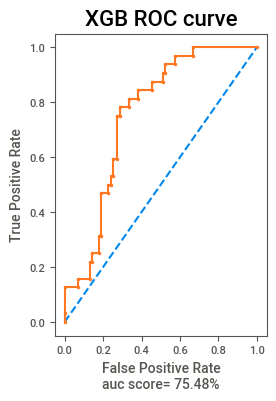

In [90]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_curve,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_pred7))
print(confusion_matrix(y_test,y_pred7))
xgb_acc_score= accuracy_score(y_test,y_pred7)
xgb_precision = precision_score(y_test,y_pred7)
xgb_recall = recall_score(y_test,y_pred7)
xgb_f1_score = f1_score(y_test,y_pred7)

xgb_cv_score = cross_val_score(xgb, X, y, cv=3, scoring = 'accuracy').mean()

xgb_AUC = roc_auc_score(y_test,y_preda7)  #AUC
fpr, tpr, thresholds = roc_curve(y_test, y_preda7) #ROC

 #  plot ROC and AUC
plt.subplot(122)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("XGB ROC curve", fontsize = 16)
plt.xlabel('False Positive Rate\nauc score= {:.2%}'.format(xgb_AUC))
plt.ylabel('True Positive Rate')

## Hyper parameter tuning

In [91]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.312, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(x_smote, y_smote)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.2, 'reg_alpha': 0.4, 'n_estimators': 115, 'max_depth': 12, 'learning_rate': 0.2, 'gamma': 0})


In [92]:
XGB2=XGBClassifier(reg_lambda=0.2,reg_alpha=0.4,n_estimators=115,max_depth=12,learning_rate=0.2,gamma=0)
XGB2.fit(x_train,y_train)
xgb_pred1 = XGB2.predict(x_test)

print(classification_report(y_test,xgb_pred1))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77        84
           1       0.26      0.16      0.20        32

    accuracy                           0.65       116
   macro avg       0.49      0.49      0.48       116
weighted avg       0.60      0.65      0.61       116



In [140]:
# # Final Report:
acc_scores=[lr_acc_score, knn_acc_score, svc_acc_score, dt_acc_score, rf_acc_score, gb_acc_score, xgb_acc_score]
precision_scores=[lr_precision, knn_precision, svc_precision, dt_precision, rf_precision, gb_precision, xgb_precision]
recall_scores=[lr_recall, knn_recall, svc_recall, dt_recall, rf_recall,gb_recall, xgb_recall]
f1_scores=[lr_f1_score, knn_f1_score, svc_f1_score, dt_f1_score, rf_f1_score, gb_f1_score, xgb_f1_score]
cv_scores=[lr_cv_score, knn_cv_score, svc_cv_score, dt_cv_score, rf_cv_score, gb_cv_score, xgb_cv_score]
AUC_scores=[lr_AUC, knn_AUC, svc_AUC, dt_AUC, rf_AUC, gb_AUC, xgb_AUC]


algorithms=['Logistic Regression','KNN','SVM','DecisionTree','RandomForest','GradientBoosting','XGBoosting',]
for i in range(len(algorithms)):
    print("The Accuray Score acheived using " + algorithms[i] + ' is: ' + str((acc_scores[i])*100)+"%")

The Accuray Score acheived using Logistic Regression is: 73.27586206896551%
The Accuray Score acheived using KNN is: 71.55172413793103%
The Accuray Score acheived using SVM is: 72.41379310344827%
The Accuray Score acheived using DecisionTree is: 67.24137931034483%
The Accuray Score acheived using RandomForest is: 71.55172413793103%
The Accuray Score acheived using GradientBoosting is: 68.96551724137932%
The Accuray Score acheived using XGBoosting is: 67.24137931034483%


## Plotting the Accuracy_Score vs Models

#### Accuracy Score function computes accuracy of a classifier is calculated as the ratio of the total number of correctly predicted samples by the total number of samples.

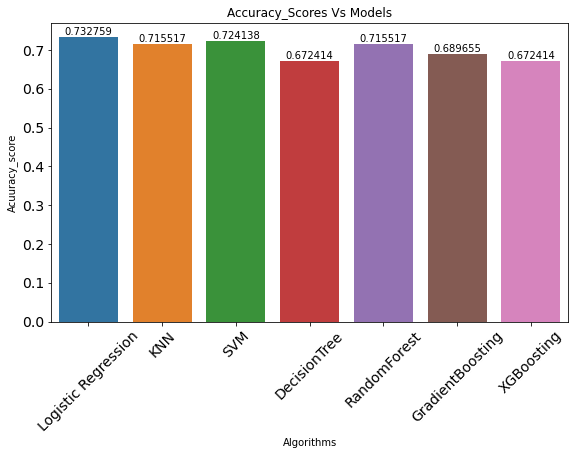

In [153]:
# plotting the barplot between algoriths and their accuracy_scores
plt.figure(figsize=(8,6))
plt.xlabel("Algorithms")
plt.ylabel("Acuuracy_score")
plt.title("Accuracy_Scores Vs Models")
ax=sns.barplot(x=algorithms,y=acc_scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.tick_params(labelsize=14)

## Precision_scores Vs Models

#### Precision Score is the fraction of predicted positives events that are actually positive and is a measure of the accuracy

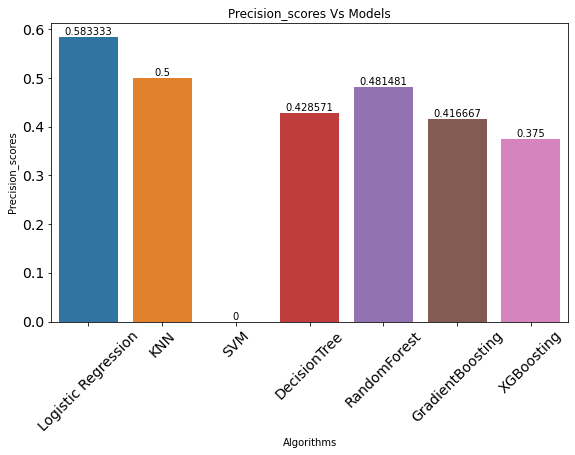

In [142]:
plt.figure(figsize=(8,6))
plt.xlabel("Algorithms")
plt.ylabel("Precision_scores")
plt.title("Precision_scores Vs Models")
ax=sns.barplot(x=algorithms,y=precision_scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.tick_params(labelsize=14)

## Recall_scores Vs Models

#### Recall (or sensitivity) Score is the fraction of positives events that were predicted correctly, or the true positive rate

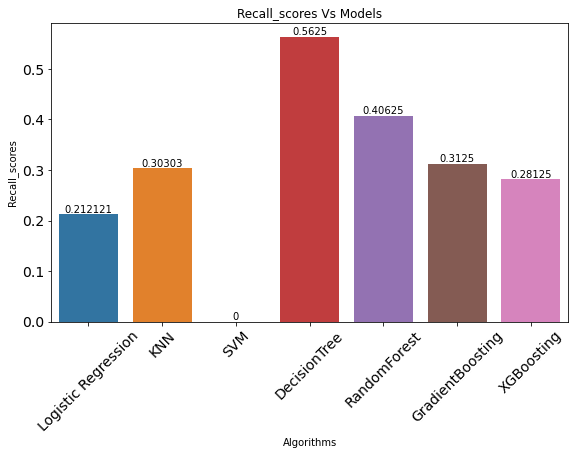

In [143]:
plt.figure(figsize=(8,6))
plt.xlabel("Algorithms")
plt.ylabel("Recall_scores")
plt.title("Recall_scores Vs Models")
ax=sns.barplot(x=algorithms,y=recall_scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.tick_params(labelsize=14)

## f1_scores Vs Models

#### F1-Score is the weighted average of Precision and Recall & F1-Score of 1 is the best, with perfect precision and recall.

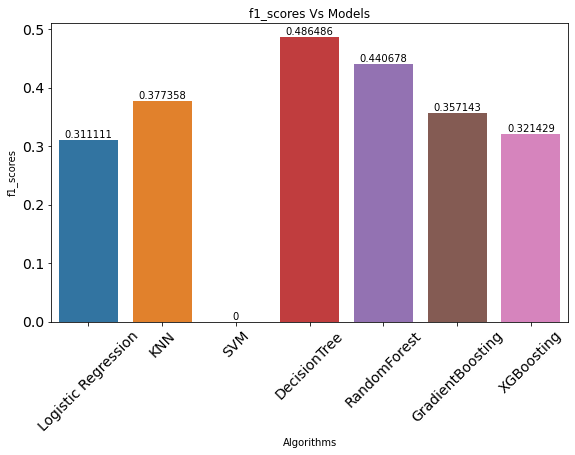

In [144]:
plt.figure(figsize=(8,6))
plt.xlabel("Algorithms")
plt.ylabel("f1_scores")
plt.title("f1_scores Vs Models")
ax=sns.barplot(x=algorithms,y=f1_scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.tick_params(labelsize=14)

## Cross_Validation Vs Models

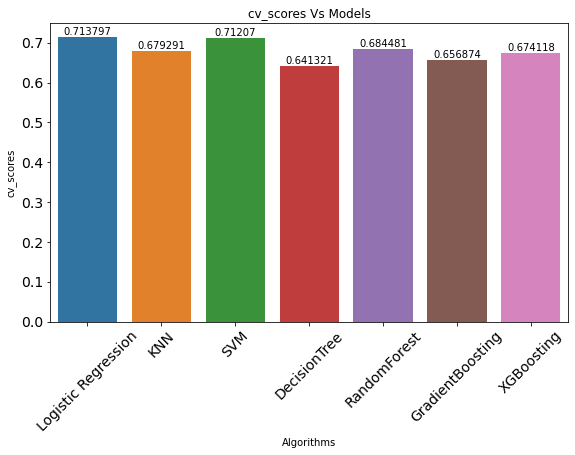

In [145]:
plt.figure(figsize=(8,6))
plt.xlabel("Algorithms")
plt.ylabel("cv_scores")
plt.title("cv_scores Vs Models")
ax=sns.barplot(x=algorithms,y=cv_scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.tick_params(labelsize=14)

## AUC Score Vs Models

#### Area Under the Curve (AUC) Score is the area under the ROC curve. The greater the area under the curve, the more accurate the test.

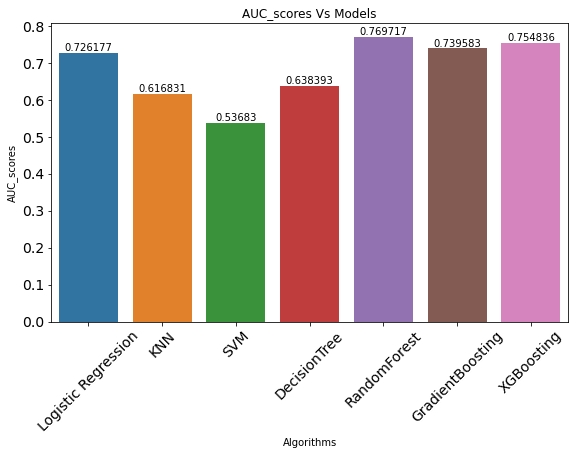

In [146]:
plt.figure(figsize=(8,6))
plt.xlabel("Algorithms")
plt.ylabel("AUC_scores")
plt.title("AUC_scores Vs Models")
ax=sns.barplot(x=algorithms,y=AUC_scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.tick_params(labelsize=14)

In [147]:
models = []   #  list with models
models.append(('DT  ', DecisionTreeClassifier()))
models.append(('KNN ', KNeighborsClassifier(n_neighbors=2)))
models.append(('LR  ', LogisticRegression(solver='liblinear')))
models.append(('RF  ', RandomForestClassifier()))
models.append(('SVM ', SVC(gamma='auto')))
models.append(('GB  ', GradientBoostingClassifier()))
models.append(('XGB ', XGBClassifier()))

models.sort()
for i in models:
    print(i)

('DT  ', DecisionTreeClassifier())
('GB  ', GradientBoostingClassifier())
('KNN ', KNeighborsClassifier(n_neighbors=2))
('LR  ', LogisticRegression(solver='liblinear'))
('RF  ', RandomForestClassifier())
('SVM ', SVC(gamma='auto'))
('XGB ', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...))


## ROC Curves for the models

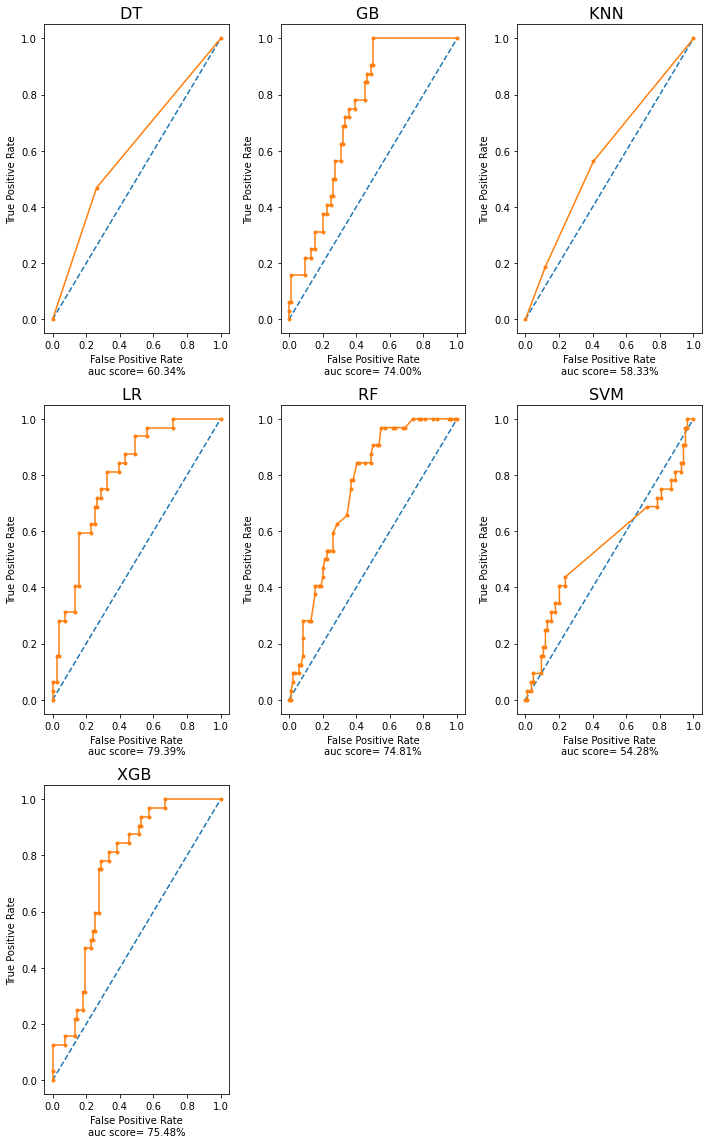

In [149]:
#  ROC plot
c = 1  # subplot counter
fig = plt.figure(figsize=(10,16))

for name, model in models:
    model.probability = True   # need for predict_proba to work
    model.fit(X_train,y_train)
    y_preda = model.predict_proba(X_test)
    y_pred = y_preda[:,1]   # positive values only

    AUC = roc_auc_score(y_test, y_pred)               # AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # ROC

    #  plot ROC and AUC
    plt.subplot(3, 3, c)
    plt.plot([0,1],[0,1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.title("{}".format(name), fontsize = 16)
    plt.xlabel('False Positive Rate\nauc score= {:.2%}'.format(AUC))
    plt.ylabel('True Positive Rate')
    
    c = c + 1

plt.tight_layout()
plt.show()